# ETF Comparison 

Simple comparison of two different MSCI World based ETFs.

1. Amundi Index Solutions (swap based)
2. XTrackers (replicated)

Following code contains data fetch from Yahoo Finance, plot comparison of both ETFs and a simple polynomial regression for both ETFs.

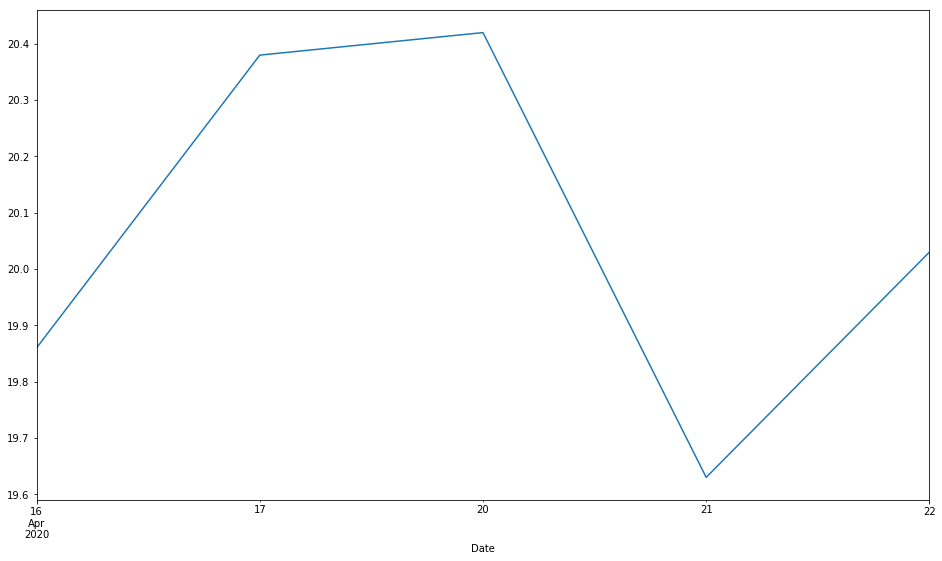

In [6]:
# base code for Yahoo Finance API data access
import yfinance as yf

msft = yf.Ticker("XMAW.DE")

# get stock info via print(msft.info)

# get historical market data
hist = msft.history(period="5d")
import matplotlib.pyplot as plt
import seaborn

# Plot everything by leveraging the very powerful matplotlib package
hist['Close'].plot(figsize=(16, 9))
plt.show()

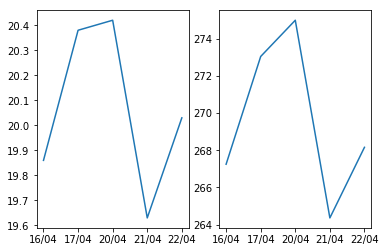

In [2]:
# PLOT comparison
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn

# tracker for AMUNDI and XTRACKER MSCI WORLD based ETF
xtracker_msci = yf.Ticker("XMAW.DE")
amundi_msci = yf.Ticker("AMEW.F")

# get historical data (5 days)
hist_xtracker = xtracker_msci.history(period="5d")
hist_amundi = amundi_msci.history(period="5d")

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(hist_xtracker.index.strftime('%d/%m'), hist_xtracker['Close'])
axes[1].plot(hist_amundi.index.strftime('%d/%m'), hist_amundi['Close'])

plt.show()

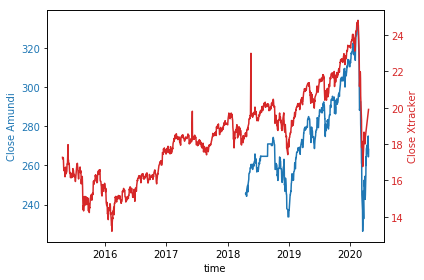

In [3]:
# PLOT comparison on same figure (different axes)
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn

#get data from FRA stock exchange
xtracker_msci = yf.Ticker("XMAW.F")
amundi_msci = yf.Ticker("AMEW.F")

# stock info print(msft.info)

# get data from 5 years
hist_amundi = amundi_msci.history(period="5y")
hist_xtracker = xtracker_msci.history(period="5y")

fig, ax_amundi = plt.subplots()

color = 'tab:blue'
ax_amundi.set_xlabel('time')
ax_amundi.set_ylabel('Close Amundi', color=color)
ax_amundi.plot(hist_amundi.index, hist_amundi['Close'], color=color)
ax_amundi.tick_params(axis='y', labelcolor=color)

ax_xtrackers = ax_amundi.twinx() 

color = 'tab:red'
ax_xtrackers.set_ylabel('Close Xtracker', color=color) 
ax_xtrackers.plot(hist_xtracker.index, hist_xtracker['Close'], color=color)
ax_xtrackers.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()


--> Plots differ as not all data is available for AMUNDI from FRA stock exchange

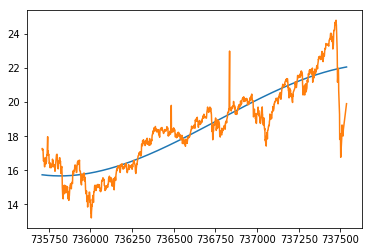

In [4]:
# polynomial fit XTracker data
import numpy as np
import matplotlib.dates as matplot_dates

x = matplot_dates.date2num(hist_xtracker.index)
coefs = np.poly1d(np.polyfit(x, hist_xtracker['Close'], 3))

ffit = np.poly1d(coefs)
x_new = np.linspace(x[0], x[-1], num=len(x)*10)

plt.plot(x_new, ffit(x_new))
plt.plot(x, hist_xtracker['Close'])

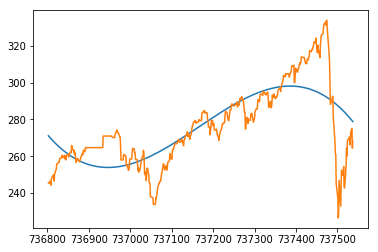

In [5]:
# polynomial fit AMUNDI data
import numpy as np
import matplotlib.dates as matplot_dates

x = matplot_dates.date2num(hist_amundi.index)
coefs = np.poly1d(np.polyfit(x, hist_amundi['Close'], 3))

ffit = np.poly1d(coefs)
x_new = np.linspace(x[0], x[-1], num=len(x)*10)

plt.plot(x_new, ffit(x_new))
plt.plot(x, hist_amundi['Close'])

Significant difference in regression as XTrackers data contains moire historical values